In [13]:
# import numpy as np
# from geopy.distance import geodesic
# from shapely.geometry import Polygon, Point
# import cartopy.feature as cfeature
# import os
# import re
# import xarray as xr

# # Function to extract coastline points within a region
# def extract_coastline(parallelogram):
#     coastline = list(cfeature.COASTLINE.geometries())
#     coastline_points = []

#     for geometry in coastline:
#         if geometry.intersects(parallelogram):
#             if geometry.geom_type == 'LineString':
#                 coastline_points.extend(np.array(geometry.coords))
#             elif geometry.geom_type == 'MultiLineString':
#                 for line in geometry:
#                     coastline_points.extend(np.array(line.coords))

#     coastline_points = np.array(coastline_points)

#     # Filter coastline points within the parallelogram
#     filtered_points = np.array([point for point in coastline_points if parallelogram.contains(Point(point))])

#     if len(filtered_points) > 1:
#         first_point = filtered_points[0]
#         last_point = filtered_points[-1]
#         if last_point[1] < first_point[1] or last_point[0] < first_point[0]:
#             filtered_points = filtered_points[::-1]

#     return filtered_points

# # Function to filter grid points within 200 km of the coast
# def filter_near_coast(grid_points, coastal_points, max_distance_km=200):
#     def is_valid_coordinate(coord):
#         """Check if a coordinate is within valid latitude/longitude bounds."""
#         lon, lat = coord
#         return -90 <= lat <= 90 and -180 <= lon <= 180

#     # Ensure all coordinates are valid
#     valid_grid_points = [point for point in grid_points if is_valid_coordinate(point)]
#     valid_coastal_points = [point for point in coastal_points if is_valid_coordinate(point)]

#     filtered_points = []
#     for point in valid_grid_points:
#         for coastal_point in valid_coastal_points:
#             try:
#                 distance_km = geodesic(point[::-1], coastal_point[::-1]).km  # Ensure (lat, lon) order
#                 if distance_km <= max_distance_km:
#                     filtered_points.append(point)
#                     break  # Move to the next grid point after finding one valid coastal point
#             except ValueError as e:
#                 print(f"Error computing distance between {point} and {coastal_point}: {e}")
#     return np.array(filtered_points)

# # Function to get grid points and corresponding file names
# def get_grid_points_and_files(base_dir):
#     grid_points = []
#     files = os.listdir(base_dir)

#     for file in files:
#         match = re.search(r"lat_(-?\d+\.\d+)_lon_(-?\d+\.\d+)", file)
#         if match:
#             lat, lon = map(float, match.groups())
#             grid_points.append((lon, lat))

#     return np.array(grid_points), files

# # Function to create the data matrix
# def create_data_matrix(files, grid_points, max_points=100):
#     data_matrix = []
#     selected_grid_points = []

#     for i, file in enumerate(files[:max_points]):
#         file_path = os.path.join(bluelink_dir, file)
#         ds = xr.open_dataset(file_path)
#         time_series = ds['filtered_sla'].values  # Replace 'filtered_sla' with the correct variable name
#         data_matrix.append(time_series)
#         selected_grid_points.append(grid_points[i])

#     return np.array(data_matrix), np.array(selected_grid_points)

# # Function to compute CEOFs
# def compute_ceofs(data_matrix):
#     data_complex = data_matrix - np.mean(data_matrix, axis=0)  # Demean the data
#     data_complex = data_complex + 1j * np.imag(data_complex)  # Add imaginary part if needed

#     U, S, Vh = np.linalg.svd(data_complex, full_matrices=False)

#     spatial_eofs = U
#     temporal_pcs = Vh.conj().T
#     singular_values = S

#     return spatial_eofs, temporal_pcs, singular_values

# # Function to visualize EOFs on a map
# def visualize_eof_on_map(spatial_eofs, grid_points, mode=0):
#     import matplotlib.pyplot as plt

#     eof_mode = spatial_eofs[:, mode]
#     x = grid_points[:, 0]
#     y = grid_points[:, 1]
#     plt.figure(figsize=(10, 8))
#     scatter = plt.scatter(x, y, c=np.real(eof_mode), cmap='viridis')
#     plt.colorbar(scatter, label=f'Real Part of EOF Mode {mode + 1}')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.title(f'Real Part of EOF Mode {mode + 1}')
#     plt.show()

# # Define the region of interest
# parallelogram_vertices = np.array([
#     [149, -38],  # Bottom-left
#     [158, -38],  # Bottom-right
#     [158, -25],  # Top-right
#     [149, -25]   # Top-left
# ])
# parallelogram = Polygon(parallelogram_vertices)

# # Extract coastal points
# coastal_points = extract_coastline(parallelogram)

# # Base directory for Bluelink data
# bluelink_dir = "/DGFI8/H/work_marcello/coastal_trapped_waves_data/filtered_grids_BLUELINK"

# # Load grid points and corresponding files
# grid_points, files = get_grid_points_and_files(bluelink_dir)

# # Filter grid points near the coast
# filtered_grid_points = filter_near_coast(grid_points, coastal_points, max_distance_km=20)
# filtered_files = [files[i] for i, point in enumerate(grid_points) if tuple(point) in map(tuple, filtered_grid_points)]

# # Create the data matrix (subset for demo)
# data_matrix, selected_grid_points = create_data_matrix(filtered_files, filtered_grid_points, max_points=1000)

# # Compute CEOFs
# spatial_eofs, temporal_pcs, singular_values = compute_ceofs(data_matrix)

# # Visualize the first EOF mode on a map
# visualize_eof_on_map(spatial_eofs, selected_grid_points, mode=0)

# # Print explained variance for the first few modes
# explained_variance = (singular_values**2) / np.sum(singular_values**2) * 100
# print("Explained Variance (%) for the first 5 modes:")
# for i, var in enumerate(explained_variance[:5]):
#     print(f"Mode {i + 1}: {var:.2f}%")


Processing SWOT dataset...
Processing CMEMS dataset...
Saved CEOF results to /DGFI8/H/work_marcello/coastal_trapped_waves_data/EOF_analysis/ceof_CMEMS.pkl


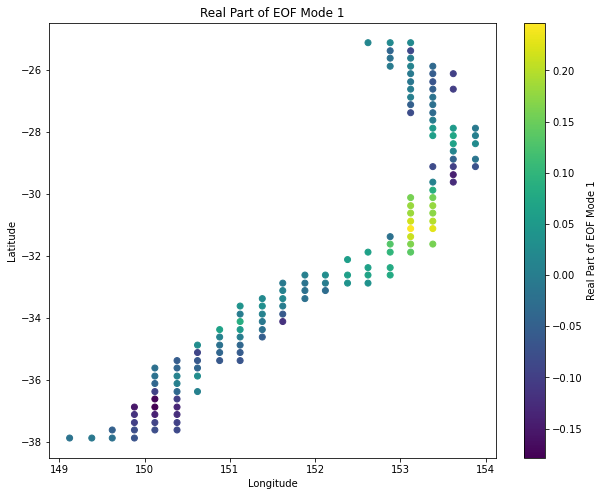

Explained Variance (%) for the first 5 modes:
Mode 1: 25.82%
Mode 2: 20.53%
Mode 3: 13.49%
Mode 4: 13.17%
Mode 5: 7.64%


In [14]:
import numpy as np
from geopy.distance import geodesic
from shapely.geometry import Polygon, Point
import cartopy.feature as cfeature
import os
import re
import xarray as xr
import matplotlib.pyplot as plt
import pickle

def extract_coastline(parallelogram):
    coastline = list(cfeature.COASTLINE.geometries())
    coastline_points = []

    for geometry in coastline:
        if geometry.intersects(parallelogram):
            if geometry.geom_type == 'LineString':
                coastline_points.extend(np.array(geometry.coords))
            elif geometry.geom_type == 'MultiLineString':
                for line in geometry:
                    coastline_points.extend(np.array(line.coords))

    coastline_points = np.array(coastline_points)

    filtered_points = np.array([point for point in coastline_points if parallelogram.contains(Point(point))])

    if len(filtered_points) > 1:
        first_point = filtered_points[0]
        last_point = filtered_points[-1]
        if last_point[1] < first_point[1] or last_point[0] < first_point[0]:
            filtered_points = filtered_points[::-1]

    return filtered_points

def filter_near_coast(grid_points, coastal_points, max_distance_km=200):
    def is_valid_coordinate(coord):
        """Check if a coordinate is within valid latitude/longitude bounds."""
        lon, lat = coord
        return -90 <= lat <= 90 and -180 <= lon <= 180

    # Ensure all coordinates are valid
    valid_grid_points = [point for point in grid_points if is_valid_coordinate(point)]
    valid_coastal_points = [point for point in coastal_points if is_valid_coordinate(point)]

    filtered_points = []
    for point in valid_grid_points:
        for coastal_point in valid_coastal_points:
            try:
                distance_km = geodesic(point[::-1], coastal_point[::-1]).km  # Ensure (lat, lon) order
                if distance_km <= max_distance_km:
                    filtered_points.append(point)
                    break  # Move to the next grid point after finding one valid coastal point
            except ValueError as e:
                print(f"Error computing distance between {point} and {coastal_point}: {e}")
    return np.array(filtered_points)

def get_grid_points_and_files(base_dir):
    grid_points = []
    files = os.listdir(base_dir)

    for file in files:
        match = re.search(r"lat_(-?\d+\.\d+)_lon_(-?\d+\.\d+)", file)
        if match:
            lat, lon = map(float, match.groups())
            grid_points.append((lon, lat))

    return np.array(grid_points), files

def create_data_matrix(base_dir, files, grid_points, max_points=100):
    data_matrix = []
    selected_grid_points = []

    for i, file in enumerate(files[:max_points]):
        file_path = os.path.join(base_dir, file)
        ds = xr.open_dataset(file_path)
        time_series = ds['filtered_sla'].values
        data_matrix.append(time_series)
        selected_grid_points.append(grid_points[i])

    return np.array(data_matrix), np.array(selected_grid_points)

def compute_ceofs(data_matrix):
    data_complex = data_matrix - np.mean(data_matrix, axis=0)
    data_complex = data_complex + 1j * np.imag(data_complex)

    U, S, Vh = np.linalg.svd(data_complex, full_matrices=False)

    spatial_eofs = U
    temporal_pcs = Vh.conj().T
    singular_values = S

    return spatial_eofs, temporal_pcs, singular_values

def visualize_eof_on_map(spatial_eofs, grid_points, mode=0):
    eof_mode = spatial_eofs[:, mode]
    x = grid_points[:, 0]
    y = grid_points[:, 1]
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x, y, c=np.real(eof_mode), cmap='viridis')
    plt.colorbar(scatter, label=f'Real Part of EOF Mode {mode + 1}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Real Part of EOF Mode {mode + 1}')
    plt.show()

def save_ceof_to_pickle(output_dir, dataset_name, spatial_eofs, temporal_pcs, singular_values, grid_points):
    output_file = os.path.join(output_dir, f"ceof_{dataset_name}.pkl")

    ceof_data = {
        "spatial_eofs": spatial_eofs,
        "temporal_pcs": temporal_pcs,
        "singular_values": singular_values,
        "grid_points": grid_points
    }

    with open(output_file, 'wb') as f:
        pickle.dump(ceof_data, f)

    print(f"Saved CEOF results to {output_file}")


# Define the region of interest
parallelogram_vertices = np.array([
    [149, -38],
    [158, -38],
    [158, -25],
    [149, -25]
])
parallelogram = Polygon(parallelogram_vertices)

# Extract coastal points
coastal_points = extract_coastline(parallelogram)

# Base directories
base_dirs = {
    #"BLUELINK": "/DGFI8/H/work_marcello/coastal_trapped_waves_data/filtered_grids_BLUELINK",
    "SWOT": "/DGFI8/H/work_marcello/coastal_trapped_waves_data/filtered_grids_SWOT",
    "CMEMS": "/DGFI8/H/work_marcello/coastal_trapped_waves_data/filtered_grids_CMEMS"
}

# Output directory
output_dir = "/DGFI8/H/work_marcello/coastal_trapped_waves_data/EOF_analysis"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each dataset
for dataset_name, base_dir in base_dirs.items():
    print(f"Processing {dataset_name} dataset...")

    # Load grid points and corresponding files
    grid_points, files = get_grid_points_and_files(base_dir)

    # Filter grid points near the coast
    filtered_grid_points = filter_near_coast(grid_points, coastal_points, max_distance_km=50)
    filtered_files = [files[i] for i, point in enumerate(grid_points) if tuple(point) in map(tuple, filtered_grid_points)]

    # Create the data matrix (subset for demo)
    data_matrix, selected_grid_points = create_data_matrix(base_dir, filtered_files, filtered_grid_points, max_points=-1)

    # Compute CEOFs
    spatial_eofs, temporal_pcs, singular_values = compute_ceofs(data_matrix)
    
    


# Save to pickle:
save_ceof_to_pickle(output_dir, dataset_name, spatial_eofs, temporal_pcs, singular_values, selected_grid_points)

# Visualize the first EOF mode on a map
visualize_eof_on_map(spatial_eofs, selected_grid_points, mode=0)

# Print explained variance for the first few modes
explained_variance = (singular_values**2) / np.sum(singular_values**2) * 100
print("Explained Variance (%) for the first 5 modes:")
for i, var in enumerate(explained_variance[:5]):
    print(f"Mode {i + 1}: {var:.2f}%")

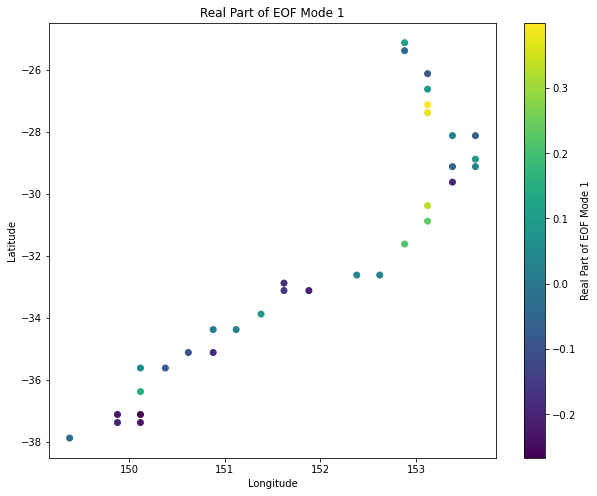

Explained Variance (%) for the first 5 modes:
Mode 1: 28.67%
Mode 2: 23.62%
Mode 3: 14.61%
Mode 4: 9.85%
Mode 5: 7.75%


In [17]:
import pickle
import numpy as np
from geopy.distance import geodesic
from shapely.geometry import Polygon, Point
import cartopy.feature as cfeature
import os
import re
import xarray as xr
import matplotlib.pyplot as plt
import pickle

def visualize_eof_from_pickle(pickle_file, mode=0):
    # Load CEOF results from the pickle file
    with open(pickle_file, 'rb') as f:
        ceof_data = pickle.load(f)

    spatial_eofs = ceof_data["spatial_eofs"]
    grid_points = ceof_data["grid_points"]
    singular_values = ceof_data["singular_values"]

    # Extract the desired EOF mode
    eof_mode = spatial_eofs[:, mode]
    x = grid_points[:, 0]
    y = grid_points[:, 1]

    # Plot the real part of the EOF mode
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x, y, c=np.real(eof_mode), cmap='viridis')
    plt.colorbar(scatter, label=f'Real Part of EOF Mode {mode + 1}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Real Part of EOF Mode {mode + 1}')
    plt.show()
    
    # Print explained variance for the first few modes
    explained_variance = (singular_values**2) / np.sum(singular_values**2) * 100
    print("Explained Variance (%) for the first 5 modes:")
    for i, var in enumerate(explained_variance[:5]):
        print(f"Mode {i + 1}: {var:.2f}%")    

# Example usage
pickle_file = "/DGFI8/H/work_marcello/coastal_trapped_waves_data/EOF_analysis/ceof_SWOT.pkl"
visualize_eof_from_pickle(pickle_file, mode=0)




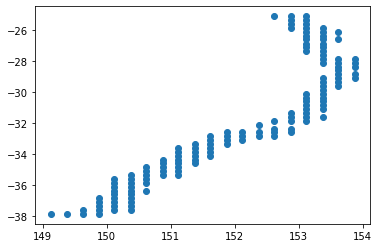

In [16]:
plt.scatter(filtered_grid_points[:,0],filtered_grid_points[:,1])